# Modelo SIR de epidemias

Este notebook muestra el modelo SIR sin interactividad de widgets. Para cambiar los parámetros (β, γ, condiciones iniciales, días), edita las variables en las celdas de código y ejecútalas de nuevo con **Shift+Enter**.

## 1. Modelo SIR: definición y sentido epidemiológico

El modelo SIR divide la población en tres compartimentos:
- **S(t)**: susceptibles
- **I(t)**: infectados
- **R(t)**: recuperados (o removidos)

Asume población cerrada y homogénea. Las ecuaciones diferenciales son:

$$\frac{dS}{dt} = -\beta \frac{S\,I}{N},$$
$$\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma I,$$
$$\frac{dR}{dt} = \gamma I,$$

donde:
- $\beta$ es la tasa de contagio.
- $\gamma$ es la tasa de recuperación.
- $N = S + I + R$ es la población total.

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def run_sir(beta, gamma, S0, I0, R0, days):
    """
    Simula el modelo SIR y muestra las curvas de Susceptibles, Infectados y Recuperados.
    """
    t = np.linspace(0, days, days + 1)
    y0 = (S0, I0, R0)
    sol = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = sol.T

    plt.figure(figsize=(8, 5))
    plt.plot(t, S, label='Susceptibles')
    plt.plot(t, I, label='Infectados')
    plt.plot(t, R, label='Recuperados')
    plt.xlabel('Días')
    plt.ylabel('Número de individuos')
    plt.title(f'β={beta:.2f}, γ={gamma:.2f}, R₀={beta/gamma:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Ejemplo de simulación

Edita los valores de β, γ y condiciones iniciales para ver distintos escenarios.

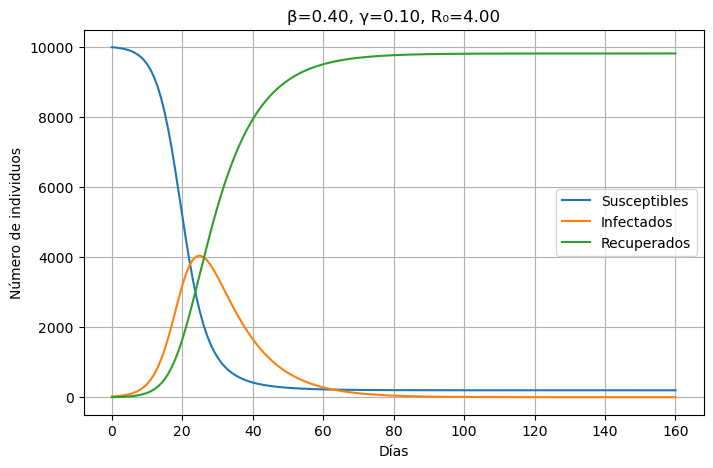

In [12]:
# Parámetros de ejemplo
beta = 0.4  # tasa de contagio
gamma = 0.1   # tasa de recuperación
S0 = 9999      # susceptibles iniciales
I0 = 20       # infectados iniciales
R0 = 0        # recuperados iniciales
days = 160    # número de días a simular
run_sir(beta, gamma, S0, I0, R0, days)

## 2. Concepto de $R_0$

El número reproductivo básico $R_0$ es:

$$R_0 = \frac{\beta}{\gamma}$$

- Si $R_0 > 1$, la infección se propaga.
- Si $R_0 < 1$, la epidemia tiende a extinguirse.

Caso R₀<1:
R₀ = 0.50


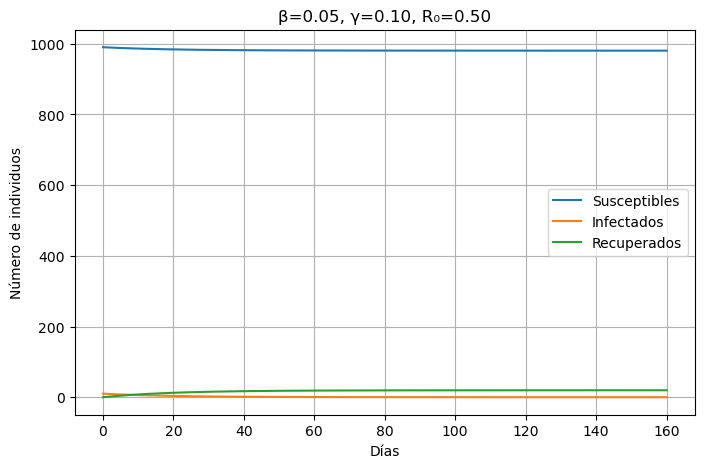

Caso R₀>1:
R₀ = 3.00


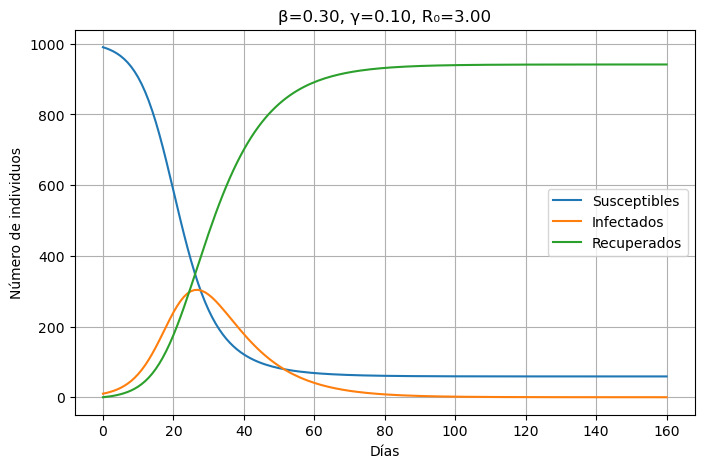

In [5]:
# Ejemplos de R₀<1 y R₀>1
print('Caso R₀<1:')
beta1, gamma1 = 0.05, 0.1
print(f'R₀ = {beta1/gamma1:.2f}')
run_sir(beta1, gamma1, 990, 10, 0, 160)

print('Caso R₀>1:')
beta2, gamma2 = 0.3, 0.1
print(f'R₀ = {beta2/gamma2:.2f}')
run_sir(beta2, gamma2, 990, 10, 0, 160)

## 3. Inmunidad de grupo

La inmunidad de grupo es la proporción mínima de individuos inmunes para detener la transmisión:

$$p_c = 1 - \frac{1}{R_0}$$

Si la fracción de inmunes supera $p_c$, la epidemia no crece.

In [6]:
def run_sir_herd(beta, gamma, S0_frac, I0_frac, days):
    """
    Simula el modelo SIR en fracciones de población y muestra el umbral de inmunidad de grupo.
    """
    t = np.linspace(0, days, days + 1)
    y0 = (S0_frac, I0_frac, 0.0)
    sol = odeint(sir_model, y0, t, args=(beta, gamma))
    S, I, R = sol.T
    R0_val = beta / gamma
    p_c = 1 - 1 / R0_val

    plt.figure(figsize=(8, 5))
    plt.plot(t, S, label='Susceptibles (fracción)')
    plt.plot(t, I, label='Infectados (fracción)')
    plt.plot(t, R, label='Recuperados (fracción)')
    plt.plot(t, I+R, label='Infectados + Recuperados (fracción)')
    plt.axhline(p_c, linestyle='--', label=f'Umbral p_c={p_c:.2f}')
    plt.xlabel('Días')
    plt.ylabel('Fracción de la población')
    plt.title(f'SIR con inmunidad de grupo (R₀={R0_val:.2f})')
    plt.legend()
    plt.grid(True)
    plt.show()

### Ejemplo de inmunidad de grupo

Edita β y γ para cambiar $R_0$ y volver a ejecutar.

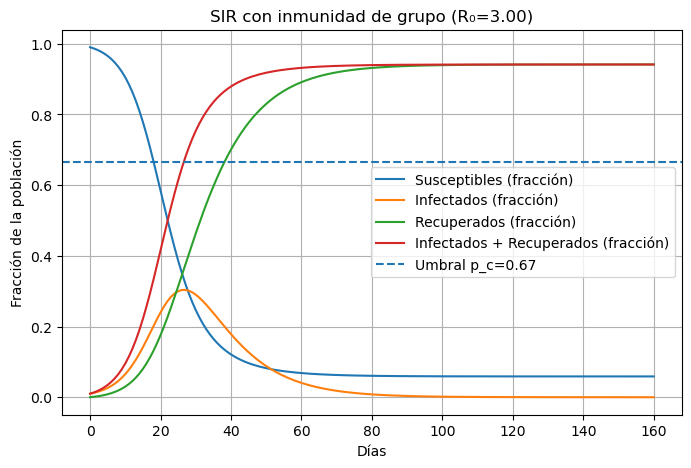

In [7]:
# Simulación de inmunidad de grupo
beta, gamma = 0.3, 0.1
run_sir_herd(beta, gamma, S0_frac=0.99, I0_frac=0.01, days=160)

----
Para ajustar parámetros, edita las variables en las celdas de código y ejecuta de nuevo con **Shift+Enter**.